# Preliminary Analysis on caRNAs Interactions with Endothelial Dysfunction

### 1. Import libraries and download files in Google Drive

In [1]:
 ## Setting up environment
!pip install scanpy anndata
import scanpy as sc
import os
import tarfile
import pandas as pd

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 50.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.5/144.5 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.2/58.2 kB 5.6 MB/s eta 0:00:00


In [9]:
## Download the data

!wget -O GSE135357_RAW.tar "https://ftp.ncbi.nlm.nih.gov/geo/series/GSE135nnn/GSE135357/suppl/GSE135357_RAW.tar"


--2025-07-11 22:12:25--  https://ftp.ncbi.nlm.nih.gov/geo/series/GSE135nnn/GSE135357/suppl/GSE135357_RAW.tar
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 130.14.250.10, 130.14.250.13, 130.14.250.31, ...
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|130.14.250.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16288696320 (15G) [application/x-tar]
Saving to: ‘GSE135357_RAW.tar’

GSE135357_RAW.tar   100%[===================>]  15.17G  12.3MB/s    in 19m 28s 

2025-07-11 22:31:53 (13.3 MB/s) - ‘GSE135357_RAW.tar’ saved [16288696320/16288696320]



In [11]:

# List the contents of the TAR file
with tarfile.open("GSE135357_RAW.tar", "r") as tar:
    file_names = tar.getnames()

# Preview the first 20 file paths
file_names[:]

['GSM4006837_HUVEC_control_HiC.bedpe.gz',
 'GSM4006838_HUVEC_H_T3d_HiC.bedpe.gz',
 'GSM4006839_HUVEC_H_T7d_HiC.bedpe.gz',
 'GSM4006840_HUVEC_control_iMARGI.bedpe.gz',
 'GSM4006841_HUVEC_H_T3d_iMARGI.bedpe.gz',
 'GSM4006842_HUVEC_H_T7d_iMARGI.bedpe.gz',
 'GSM4006843_HUVEC_control_scRNA_1_barcodes.tsv.gz',
 'GSM4006843_HUVEC_control_scRNA_1_features.tsv.gz',
 'GSM4006843_HUVEC_control_scRNA_1_matrix.mtx.gz',
 'GSM4006844_HUVEC_control_scRNA_2_barcodes.tsv.gz',
 'GSM4006844_HUVEC_control_scRNA_2_features.tsv.gz',
 'GSM4006844_HUVEC_control_scRNA_2_matrix.mtx.gz',
 'GSM4006845_HUVEC_H_T3d_scRNA_1_barcodes.tsv.gz',
 'GSM4006845_HUVEC_H_T3d_scRNA_1_features.tsv.gz',
 'GSM4006845_HUVEC_H_T3d_scRNA_1_matrix.mtx.gz',
 'GSM4006846_HUVEC_H_T3d_scRNA_2_barcodes.tsv.gz',
 'GSM4006846_HUVEC_H_T3d_scRNA_2_features.tsv.gz',
 'GSM4006846_HUVEC_H_T3d_scRNA_2_matrix.mtx.gz',
 'GSM4006847_HUVEC_H_T7d_scRNA_1_barcodes.tsv.gz',
 'GSM4006847_HUVEC_H_T7d_scRNA_1_features.tsv.gz',
 'GSM4006847_HUVEC_H_T7d_scRN

In [2]:
# Mount google drive to co-lab

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd /content/drive/MyDrive/Z.Chen/

/content/drive/MyDrive/Z.Chen


In [14]:

# Define your target extraction path (inside your Drive)
output_dir = "/content/drive/MyDrive/Z.Chen/iMARGI_extracted"
os.makedirs(output_dir, exist_ok=True)

# Extract only iMARGI .bedpe.gz files
with tarfile.open("GSE135357_RAW.tar", "r") as tar:
    iMARGI_files = [m for m in tar.getmembers() if "_iMARGI.bedpe.gz" in m.name]
    tar.extractall(path=output_dir, members=iMARGI_files)

# List files extracted
os.listdir(output_dir)

['GSM4006840_HUVEC_control_iMARGI.bedpe.gz',
 'GSM4006841_HUVEC_H_T3d_iMARGI.bedpe.gz',
 'GSM4006842_HUVEC_H_T7d_iMARGI.bedpe.gz',
 'GSM4729222_HUVEC_control_2_iMARGI.bedpe.gz',
 'GSM4729223_HUVEC_H_T7d_2_iMARGI.bedpe.gz']

In [4]:
pwd

'/content/drive/MyDrive/Z.Chen'

### Explore dataset 6840

In [4]:
df = pd.read_csv("./iMARGI_extracted/GSM4006840_HUVEC_control_iMARGI.bedpe.gz", sep='\t', comment='#', header=None)

# Preview the first few rows
df.head()

,0,1,2,3,4,5,6,7,8,9
0,chr4,40944863,40944903,chr4,40944853,40944901,.,.,+,-
1,chr12,53043128,53043227,chr12,53043250,53043351,.,.,+,-
2,chr4,40924463,40924535,chr3,111255038,111255094,.,.,+,-
3,chr1,179100935,179101034,chr1,179100959,179101060,.,.,+,-
4,chr18,61758386,61758485,chr18,61758326,61758427,.,.,-,+


In [5]:
df_6840 = df

In [6]:
#adding corresponding column names for the dataframe

df_6840 = df

df_6840.columns = [
    "RNA_chr", "RNA_start", "RNA_end",
    "DNA_chr", "DNA_start", "DNA_end",
    "name", "score", "RNA_strand", "DNA_strand"
]
df_6840.head()

,RNA_chr,RNA_start,RNA_end,DNA_chr,DNA_start,DNA_end,name,score,RNA_strand,DNA_strand
0,chr4,40944863,40944903,chr4,40944853,40944901,.,.,+,-
1,chr12,53043128,53043227,chr12,53043250,53043351,.,.,+,-
2,chr4,40924463,40924535,chr3,111255038,111255094,.,.,+,-
3,chr1,179100935,179101034,chr1,179100959,179101060,.,.,+,-
4,chr18,61758386,61758485,chr18,61758326,61758427,.,.,-,+


In [7]:
df_6840.head(20)

,RNA_chr,RNA_start,RNA_end,DNA_chr,DNA_start,DNA_end,name,score,RNA_strand,DNA_strand
0,chr4,40944863,40944903,chr4,40944853,40944901,.,.,+,-
1,chr12,53043128,53043227,chr12,53043250,53043351,.,.,+,-
2,chr4,40924463,40924535,chr3,111255038,111255094,.,.,+,-
3,chr1,179100935,179101034,chr1,179100959,179101060,.,.,+,-
4,chr18,61758386,61758485,chr18,61758326,61758427,.,.,-,+
5,chr8,52371188,52371281,chr8,52371189,52371281,.,.,+,-
6,chr12,51995794,51995893,chr12,51995721,51995822,.,.,-,+
7,chr18,12312825,12312868,chr3,196107145,196107241,.,.,-,+
8,chr6,3383092,3383143,chr4,41008298,41008348,.,.,+,+
9,chr6,116339385,116339479,chr2,127641899,127642000,.,.,-,-


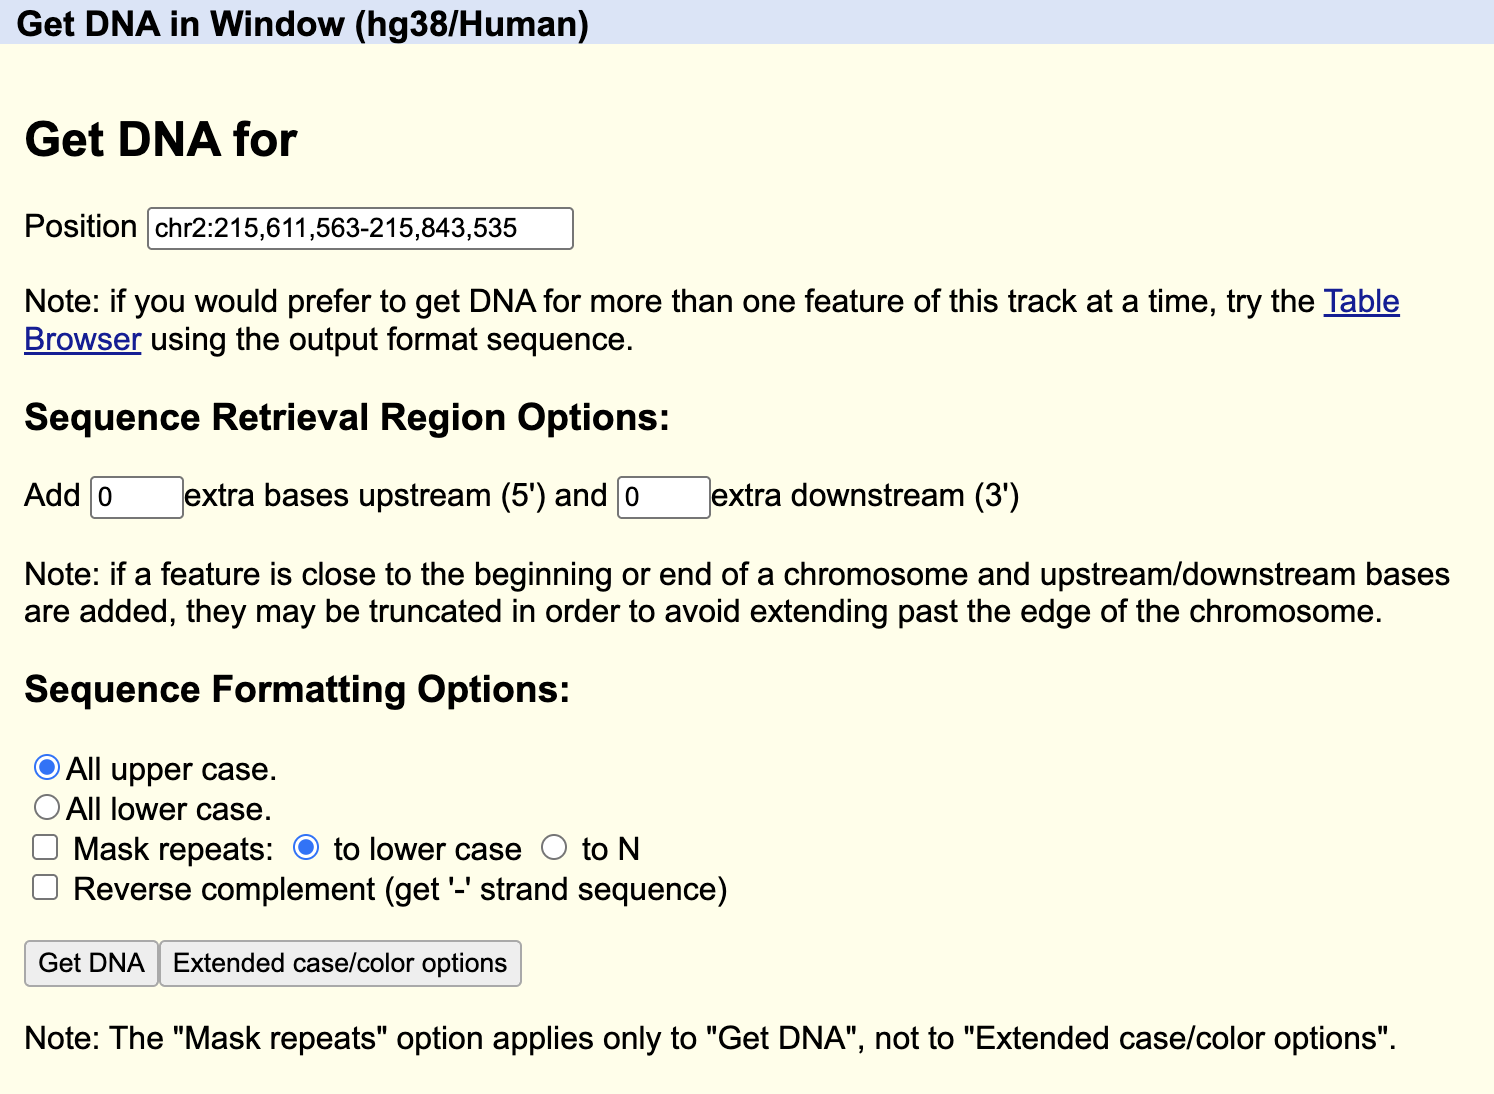

In [8]:
# Locate LINC00607 position
from IPython.display import Image

Image('/content/drive/My Drive/Z.Chen/position_info_LINC00607.png')

In [9]:
LINC00607 = 'chr2:215,611,563–215,843,535'

# Define LINC00607 region
linc_chr = "chr2"
linc_start = 215611563
linc_end = 215843535

# Filter RNA-side reads overlapping LINC00607
linc00607_df = df_6840[
    (df_6840["RNA_chr"] == linc_chr) &
    (df_6840["RNA_end"] >= linc_start) &
    (df_6840["RNA_start"] <= linc_end)
]

# Preview results
linc00607_df.shape


(18868, 10)

In [10]:
df_6840.shape

(66258772, 10)

In [11]:
percentage = round((18868/66258772)*100,3)

In [12]:
print(f'there is {percentage} percentage of the DNA shows connections with LINC00607')

there is 0.028 percentage of the DNA shows connections with LINC00607


In [13]:
linc00607_df.head(10)

,RNA_chr,RNA_start,RNA_end,DNA_chr,DNA_start,DNA_end,name,score,RNA_strand,DNA_strand
6708,chr2,215657129,215657226,chr2,222636600,222636701,.,.,+,-
10525,chr2,215841155,215841254,chr2,215841208,215841309,.,.,+,-
16031,chr2,215696327,215696426,chr2,215696340,215696441,.,.,+,-
18787,chr2,215670740,215670824,chr2,215670740,215670823,.,.,+,-
21502,chr2,215622700,215622766,chr2,215622694,215622774,.,.,+,-
40827,chr2,215720131,215720230,chr3,176217647,176217706,.,.,+,-
43594,chr2,215802172,215802271,chr2,215802209,215802310,.,.,+,-
44009,chr2,215654468,215654542,chr2,215654468,215654542,.,.,+,-
46562,chr2,215818164,215818263,chr10,70276809,70276910,.,.,+,-
46792,chr2,215731775,215731843,chr1,47271457,47271558,.,.,+,+


In [14]:
linc00607_df.value_counts().head(200)

RNA_chr  RNA_start  RNA_end    DNA_chr  DNA_start  DNA_end    name  score  RNA_strand  DNA_strand
chr2     215737591  215737619  chr2     215737591  215737619  .     .      +           -             16
         215638999  215639057  chr2     215638999  215639056  .     .      +           -             11
         215636994  215637044  chr2     215636994  215637040  .     .      +           -             10
         215660790  215660830  chr2     215660790  215660829  .     .      +           -             10
         215827331  215827385  chr2     215827331  215827384  .     .      +           -             10
                                                                                                     ..
         215617060  215617148  chr2     228764895  228764955  .     .      +           -              4
         215642236  215642335  chr2     215642280  215642381  .     .      +           -              4
         215653223  215653321  chr2     215653233  215653334  .     .      +           -              4
         215721870  215721922  chr14    54416700   54416793   .     .      +           +              4
         215721874  215721940  chr2     215527830  215527877  .     .      +           -              4
Name: count, Length: 200, dtype: int64

### Build network

In [15]:
import networkx as nx
import matplotlib.pyplot as plt

vc = linc00607_df.value_counts().reset_index(name='count')

vc = vc.sort_values(by='count', ascending=False).head(100)



G = nx.Graph()

G.add_node('LINC00607')

for _, row in vc.iterrows():
    # Create a label for the DNA site
    dna_label = f"{row['DNA_chr']}:{row['DNA_start']}-{row['DNA_end']}"

    # Add node for DNA site with count as an attribute
    G.add_node(dna_label, count=row['count'])

    # Create edge from LINC00607 to DNA site
    G.add_edge("LINC00607", dna_label, weight=row['count'])

plt.figure(figsize=(14, 12))
pos = nx.spring_layout(G, k=0.6, seed=42)

<Figure size 1400x1200 with 0 Axes>

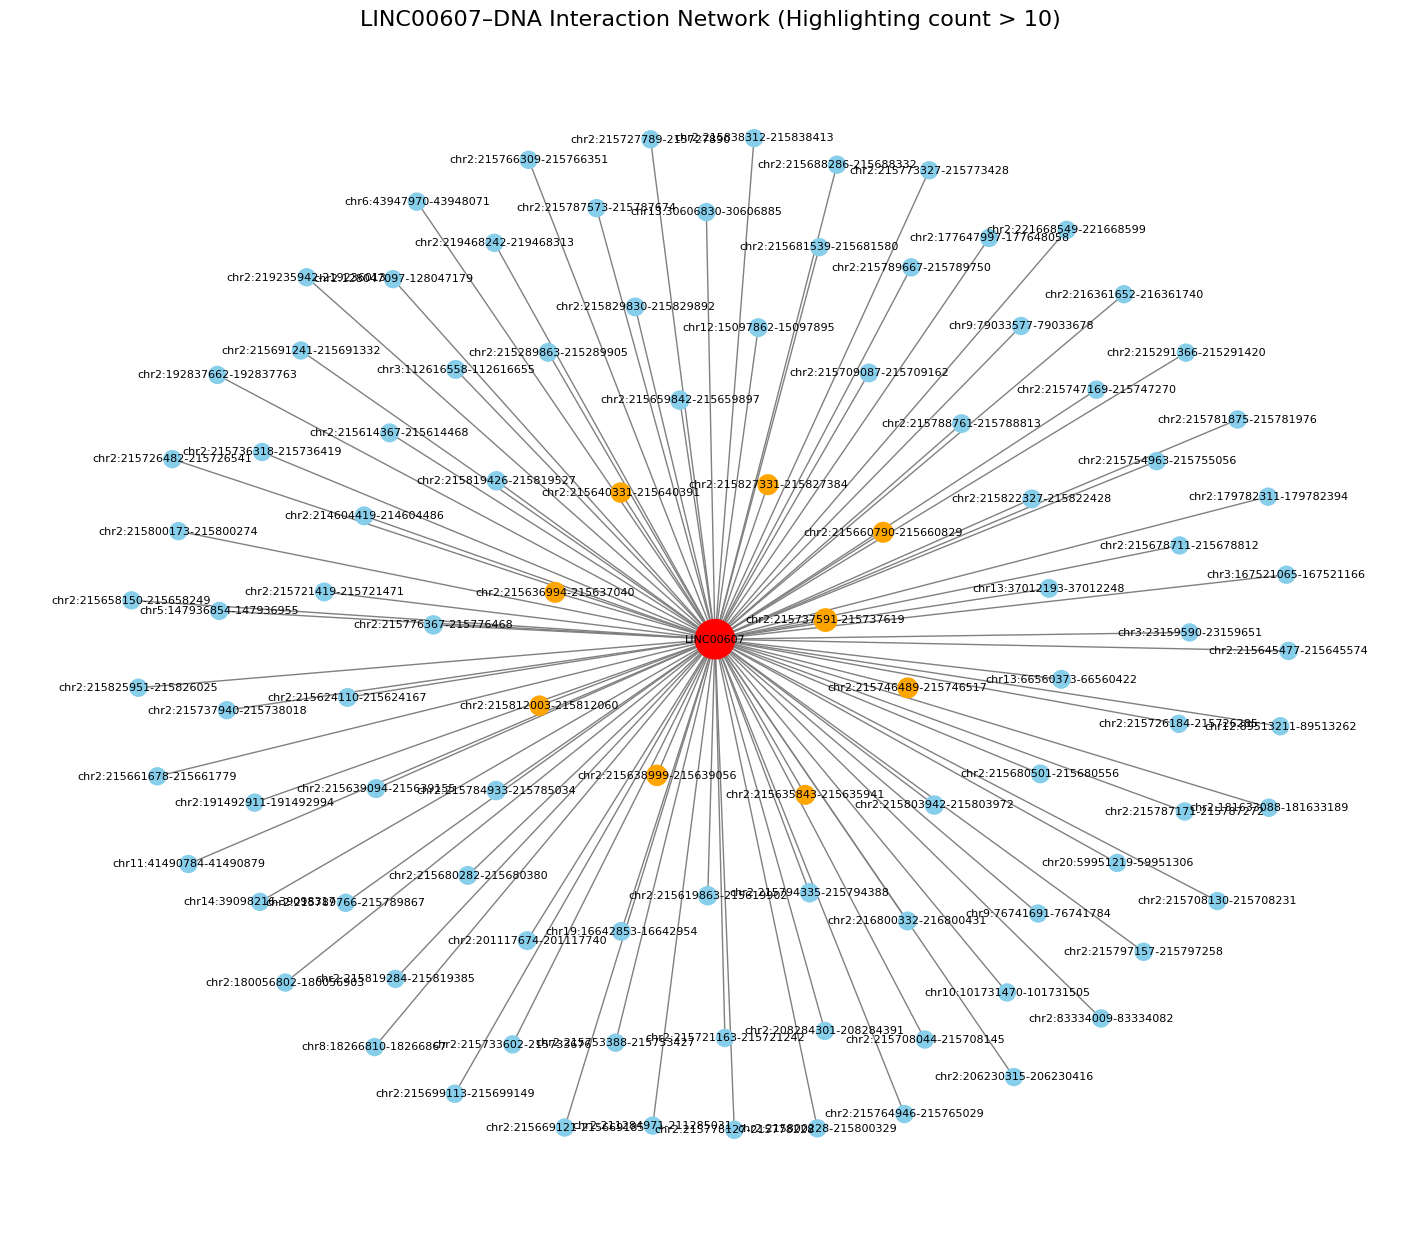

In [18]:
# Set node sizes and colors based on count
node_sizes = []
node_colors = []

for node in G.nodes():
    if node == "LINC00607":
        node_sizes.append(800)
        node_colors.append('red')
    else:
        count = G.nodes[node].get("count", 1)
        node_sizes.append(100 + count * 10)
        # Highlight if count > 10
        if count > 7:
            node_colors.append('orange')  # Highlight color
        else:
            node_colors.append('skyblue')  # Default

# Draw the graph
plt.figure(figsize=(14, 12))
pos = nx.spring_layout(G, k=0.6, seed=42)

nx.draw(
    G, pos,
    with_labels=True,
    node_size=node_sizes,
    node_color=node_colors,
    edge_color='gray',
    font_size=8
)

plt.title("LINC00607–DNA Interaction Network (Highlighting count > 10)", fontsize=16)
plt.axis('off')
plt.show()


### Dataset 6841

In [19]:
df_6841 = pd.read_csv("./iMARGI_extracted/GSM4006841_HUVEC_H_T3d_iMARGI.bedpe.gz", sep='\t', comment='#', header=None)

# Preview the first few rows
df_6841.head()

,0,1,2,3,4,5,6,7,8,9
0,chr9,121748080,121748117,chr12,92750931,92751032,.,.,-,-
1,chr17,7703343,7703383,chr20,51878695,51878785,.,.,-,+
2,chr12,102104462,102104561,chr6,18515752,18515853,.,.,+,-
3,chr5,142990624,142990693,chr5,144177568,144177669,.,.,-,+
4,chr14,64947591,64947690,chr14,64947757,64947858,.,.,+,-


In [20]:
df_6841.shape

(53721535, 10)

### Writing a function to put up a pinpeline for generating co-expression networks

In [50]:
def get_coexp_network(dna_coordinate, iMARGI_files, freq):
  df = pd.read_csv(iMARGI_files, sep='\t', comment='#', header=None)

  # truncate for 10 columns
  if df.shape[1] > 10:
    df = df.iloc[:, :10]


  df.columns = [
    "RNA_chr", "RNA_start", "RNA_end",
    "DNA_chr", "DNA_start", "DNA_end",
    "name", "score", "RNA_strand", "DNA_strand"
  ]


  linc_chr = dna_coordinate.split(':')[0]
  coord = dna_coordinate.split(':')[1].replace(',', '').replace('–', '-')
  linc_start, linc_end = map(int, coord.split('-'))


  linc_df = df[
    (df['DNA_chr'] == linc_chr) &
    (df['DNA_start'] <= linc_end) &
    (df['DNA_end'] >= linc_start)
  ]

  vc = linc_df.value_counts().reset_index(name='count')
  vc = vc.sort_values(by='count', ascending=False).head(100)

  G = nx.Graph()
  G.add_node(dna_coordinate)

  for _, row in vc.iterrows():
    dna_label = f"{row['DNA_chr']}:{row['DNA_start']}-{row['DNA_end']}"
    G.add_node(dna_label, count=row['count'])

    G.add_edge(dna_coordinate, dna_label, weight=row['count'])

  plt.figure(figsize=(14, 12))
  pos = nx.spring_layout(G, k=0.6, seed=42)

  node_sizes = []
  node_colors = []

  for node in G.nodes():
      if node == dna_coordinate:
          node_sizes.append(800)
          node_colors.append('red')
      else:
          count = G.nodes[node].get("count", 1)
          node_sizes.append(100 + count * 10)
          # Highlight if count > frequency
          if count > freq:
              node_colors.append('orange')  # Highlight color
          else:
              node_colors.append('skyblue')  # Default

  # Draw the graph
  plt.figure(figsize=(14, 12))
  pos = nx.spring_layout(G, k=0.6, seed=42)

  nx.draw(
      G, pos,
      with_labels=True,
      node_size=node_sizes,
      node_color=node_colors,
      edge_color='gray',
      font_size=8
  )

  plt.title(f"{dna_coordinate} Interaction Network (Highlighting count > {freq})", fontsize=16)
  plt.axis('off')
  plt.show()


In [51]:
pwd

'/content/drive/MyDrive/Z.Chen/iMARGI_extracted'

In [27]:
ls

GSM4006840_HUVEC_control_iMARGI.bedpe.gz
GSM4006841_HUVEC_H_T3d_iMARGI.bedpe.gz
GSM4006842_HUVEC_H_T7d_iMARGI.bedpe.gz
GSM4729222_HUVEC_control_2_iMARGI.bedpe.gz
GSM4729223_HUVEC_H_T7d_2_iMARGI.bedpe.gz


In [42]:
df = pd.read_csv("./GSM4729222_HUVEC_control_2_iMARGI.bedpe.gz", sep='\t', comment='#', header=None)

In [46]:
df_6840.head()

,RNA_chr,RNA_start,RNA_end,DNA_chr,DNA_start,DNA_end,name,score,RNA_strand,DNA_strand
0,chr4,40944863,40944903,chr4,40944853,40944901,.,.,+,-
1,chr12,53043128,53043227,chr12,53043250,53043351,.,.,+,-
2,chr4,40924463,40924535,chr3,111255038,111255094,.,.,+,-
3,chr1,179100935,179101034,chr1,179100959,179101060,.,.,+,-
4,chr18,61758386,61758485,chr18,61758326,61758427,.,.,-,+


In [44]:
df.head(20)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,chr1,197131211,197131310,chr1,197131258,197131359,K00180:743:H2TV7BBXY:6:1101:1205:32103,1,+,-,ENSG00000066279|ASPM|protein_coding,.,ENSG00000066279|ASPM|protein_coding,.,147
1,chr12,69551232,69551331,chr17,4715370,4715423,K00180:743:H2TV7BBXY:6:1101:1205:32279,1,-,-,ENSG00000166225|FRS2|protein_coding,.,ENSG00000141480|ARRB2|protein_coding,.,Inter-chromosome
2,chr15,39592565,39592607,chr18,31843437,31843538,K00180:743:H2TV7BBXY:6:1101:1205:37343,1,-,-,ENSG00000137801|THBS1|protein_coding,.,ENSG00000153339|TRAPPC8|protein_coding,.,Inter-chromosome
3,chr17,21002150,21002214,chr17,21002150,21002214,K00180:743:H2TV7BBXY:6:1101:1205:44939,1,+,-,"ENSG00000124422|USP22|protein_coding,ENSG00000...",.,"ENSG00000124422|USP22|protein_coding,ENSG00000...",.,63
4,chr5,72197322,72197421,chr5,72197305,72197406,K00180:743:H2TV7BBXY:6:1101:1205:48667,1,-,+,ENSG00000131711|MAP1B|protein_coding,.,ENSG00000131711|MAP1B|protein_coding,.,83
5,chr17,3734910,3735009,chr17,3735023,3735124,K00180:743:H2TV7BBXY:6:1101:1215:8312,1,+,-,ENSG00000083457|ITGAE|protein_coding,.,ENSG00000083457|ITGAE|protein_coding,.,213
6,chr12,65892819,65892870,chr12,108113560,108113649,K00180:743:H2TV7BBXY:6:1101:1215:17491,1,-,+,ENSG00000149948|HMGA2|protein_coding,.,.,.,42220829
7,chr2,61516970,61517043,chr11,74361615,74361716,K00180:743:H2TV7BBXY:6:1101:1215:25052,1,+,-,ENSG00000082898|XPO1|protein_coding,.,ENSG00000165434|PGM2L1|protein_coding,.,Inter-chromosome
8,chr12,47181158,47181257,chr1,92429573,92429674,K00180:743:H2TV7BBXY:6:1101:1215:30151,1,-,+,ENSG00000179715|PCED1B|protein_coding,.,.,.,Inter-chromosome
9,chr2,95096475,95096517,chr8,66180054,66180155,K00180:743:H2TV7BBXY:6:1101:1215:38310,1,+,-,ENSG00000144029|MRPS5|protein_coding,.,.,.,Inter-chromosome


<Figure size 1400x1200 with 0 Axes>

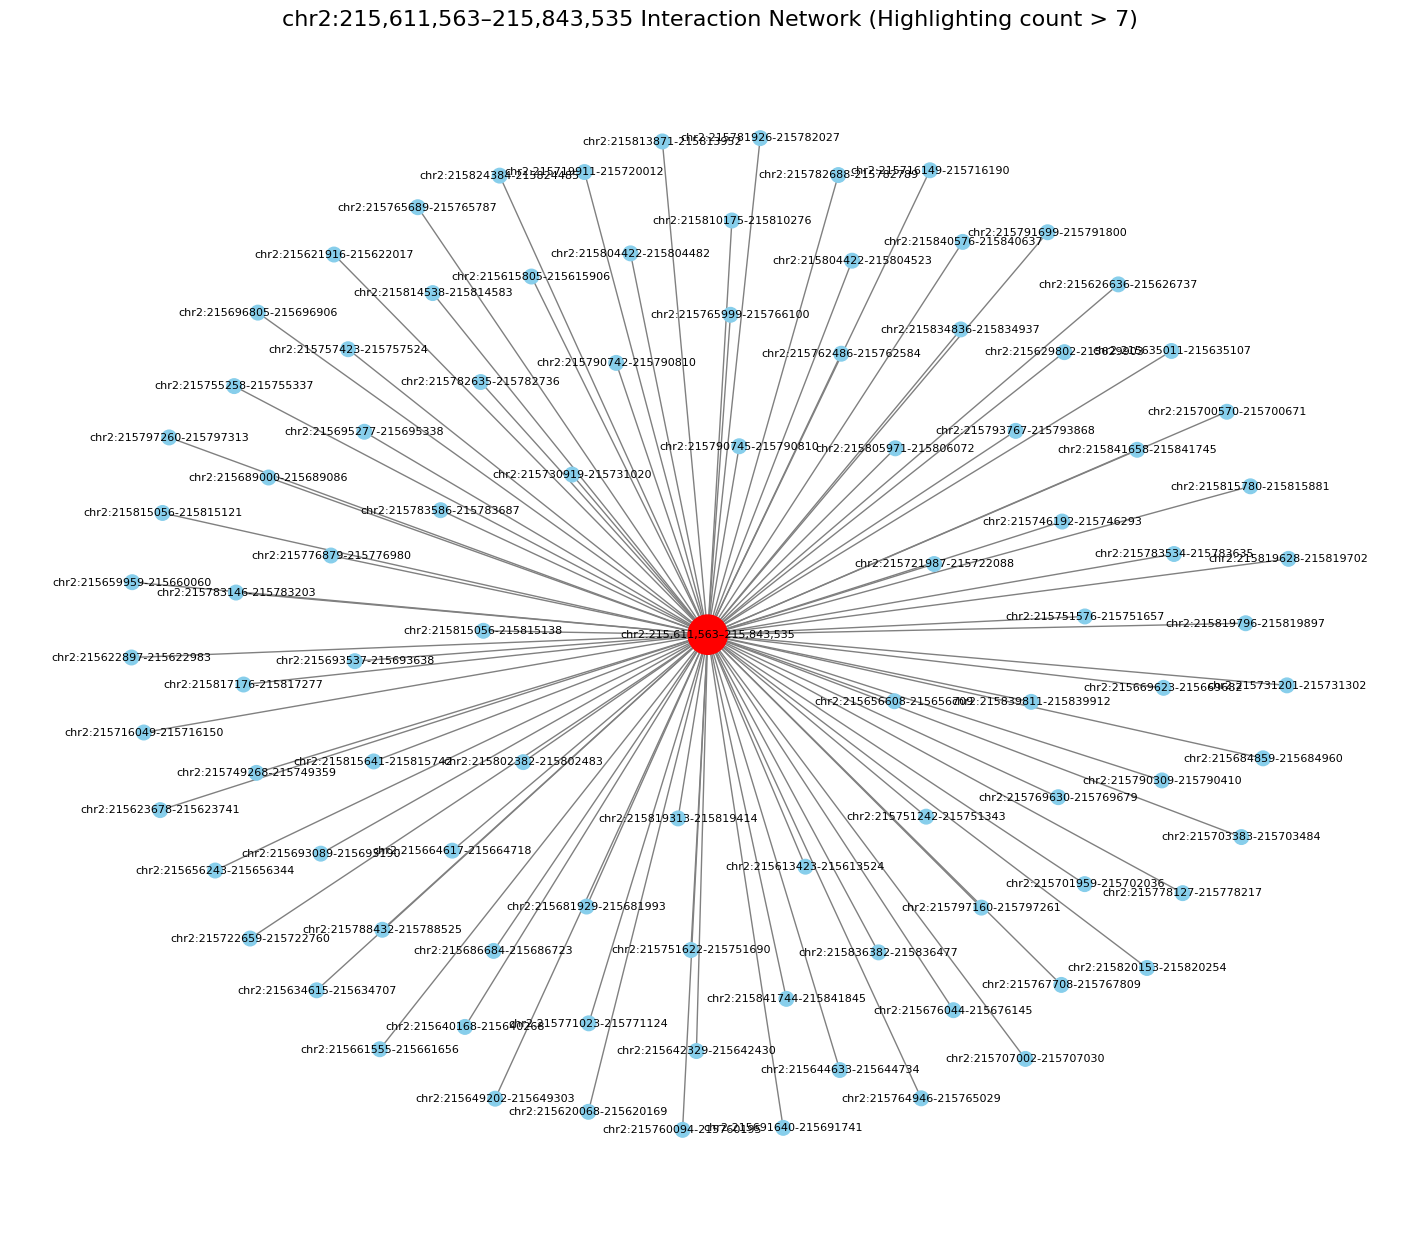

In [56]:
get_coexp_network('chr2:215,611,563–215,843,535', "/content/drive/MyDrive/Z.Chen/iMARGI_extracted/GSM4729223_HUVEC_H_T7d_2_iMARGI.bedpe.gz", 7)